In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#importing the file
df = pd.read_excel("Gr_vs_GrTarget.xlsx")

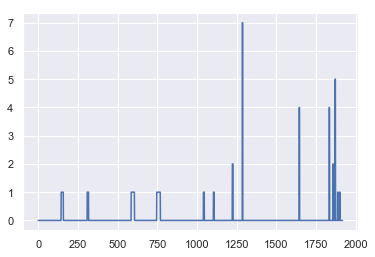

In [3]:
#creating a Trigger channel
df["Diff"] = abs(df.Gr_Target-df.Gr)
plt.plot(df.Diff)

In [4]:
#filtering the data frame where diff>0
df1 = df[df["Diff"].diff()>0]
df1

,Gr,Gr_Target,Diff
145,0,1,1
309,1,2,1
586,2,3,1
747,3,4,1
1041,4,5,1
1104,5,6,1
1223,6,8,2
1286,8,1,7
1644,1,5,4
1833,5,9,4


In [5]:
#pivoting the table to find the counts
Table = pd.pivot_table(df1, index = ["Gr"], columns = ["Gr_Target"], values = ["Gr_Target"] ,aggfunc = "count")
print(Table)

          Diff                                        
Gr_Target    1    2    3    4    5    6    7    8    9
Gr                                                    
0          1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
1          NaN  2.0  NaN  NaN  1.0  NaN  NaN  NaN  NaN
2          1.0  NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN
3          NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN
4          NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN
5          NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  1.0
6          NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN
7          NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
8          1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN
9          NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN


Text(66.5, 0.5, 'Gr')

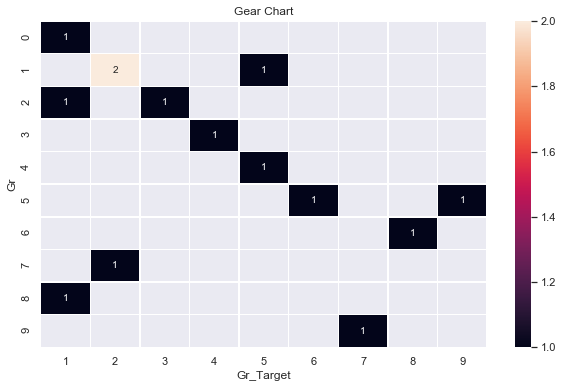

In [6]:
#plotting the heatmap
plt.figure(figsize = (10,6))
sns.heatmap(Table, linewidths = 0.5, xticklabels = [1,2,3,4,5,6,7,8,9], yticklabels = [0,1,2,3,4,5,6,7,8,9], annot = True)
plt.title("Gear Chart")
plt.xlabel("Gr_Target")
plt.ylabel("Gr")